### 문제정의(목표)

500명의 키와 몸무게, 성별 데이터를 가지고 비만도 라벨을 이용해 비만을 판단하는 모델을 만들어보자

### 데이터 수집

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [4]:
bmi = pd.read_csv('bmi_500.csv', index_col='Label') #한글 인코딩 필요한 경우: encoding='utf-8','utf-8 encoding??'

In [5]:
bmi

Gender  Height  Weight
Label                                  
Obesity            Male     174      96
Normal             Male     189      87
Obesity          Female     185     110
Overweight       Female     195     104
Overweight         Male     149      61
...                 ...     ...     ...
Extreme Obesity  Female     150     153
Obesity          Female     184     121
Extreme Obesity  Female     141     136
Extreme Obesity    Male     150      95
Extreme Obesity    Male     173     131

[500 rows x 3 columns]

### 데이터 전처리 : (전처리 스킵)

### 탐색적 데이터 분석

In [6]:
bmi.loc['Normal']
#Normal인 Label만 뽑아보기

Gender  Height  Weight
Label                         
Normal    Male     189      87
Normal    Male     195      81
Normal    Male     155      51
Normal    Male     191      79
Normal  Female     172      67
...        ...     ...     ...
Normal  Female     178      65
Normal    Male     167      64
Normal  Female     151      55
Normal    Male     187      80
Normal  Female     164      59

[69 rows x 3 columns]

In [7]:
bmi.info()
# data 확인
#Dtype: object(문자)

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, Obesity to Extreme Obesity
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 31.8+ KB


In [8]:
bmi.describe()

Height      Weight
count  500.000000  500.000000
mean   169.944000  106.000000
std     16.375261   32.382607
min    140.000000   50.000000
25%    156.000000   80.000000
50%    170.500000  106.000000
75%    184.000000  136.000000
max    199.000000  160.000000

In [9]:
bmi.index.unique()
#index 하나씩 뽑아보기

Index(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'],
      dtype='object', name='Label')

### 시각화

In [11]:
def myScatter(label,color):
    
    tmp = bmi.loc[label]
    
    plt.scatter(tmp['Weight'],
                tmp['Height'],
                c = color,
                label = label)
#scatter: 산점도

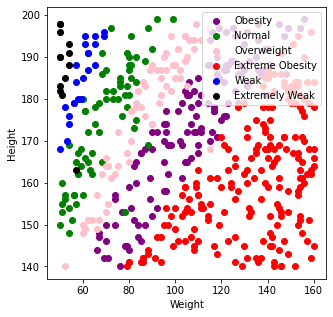

In [12]:
plt.figure(figsize=(5,5))

myScatter('Obesity','purple')
myScatter('Normal','green')
myScatter('Overweight','pink')
myScatter('Extreme Obesity','red')
myScatter('Weak','blue')
myScatter('Extremely Weak','black')

plt.legend(loc='upper right')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

### 모델링(모델선택)

In [18]:
bmi = pd.read_csv('bmi_500.csv')
bmi

Gender  Height  Weight            Label
0      Male     174      96          Obesity
1      Male     189      87           Normal
2    Female     185     110          Obesity
3    Female     195     104       Overweight
4      Male     149      61       Overweight
..      ...     ...     ...              ...
495  Female     150     153  Extreme Obesity
496  Female     184     121          Obesity
497  Female     141     136  Extreme Obesity
498    Male     150      95  Extreme Obesity
499    Male     173     131  Extreme Obesity

[500 rows x 4 columns]

In [19]:
x = bmi.loc[:,'Height':'Weight']
y = bmi.loc[:,'Label']

In [21]:
print(x.shape)
#행:500개, 열:2개

(500, 2)


In [22]:
print(y.shape)

(500,)


In [24]:
# train
x_train = x.iloc[:350, :]
# test
x_test = x.iloc[350:, :]
# train_label
y_train = y.iloc[:350]  #y_train: x_train의 정답 데이터
# test_label 
y_test = y.iloc[350:]  #y_test: x_test의 정답 데이터

In [25]:
print(x_train)

     Height  Weight
0       174      96
1       189      87
2       185     110
3       195     104
4       149      61
..      ...     ...
345     184     106
346     191      68
347     162      58
348     178     138
349     157      60

[350 rows x 2 columns]


In [26]:
print(x_test)

     Height  Weight
350     184      83
351     197      88
352     160      51
353     184     153
354     190      50
..      ...     ...
495     150     153
496     184     121
497     141     136
498     150      95
499     173     131

[150 rows x 2 columns]


In [27]:
print(y_train)

0              Obesity
1               Normal
2              Obesity
3           Overweight
4           Overweight
            ...       
345            Obesity
346             Normal
347             Normal
348    Extreme Obesity
349             Normal
Name: Label, Length: 350, dtype: object


In [30]:
print(y_test.shape)

(150,)


### 모델 생성

In [42]:
knn_model = KNeighborsClassifier(n_neighbors=10)

In [43]:
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [44]:
pred = knn_model.predict(x_test)

In [45]:
pred

array(['Normal', 'Normal', 'Normal', 'Extreme Obesity', 'Extremely Weak',
       'Obesity', 'Obesity', 'Extreme Obesity', 'Weak', 'Extreme Obesity',
       'Weak', 'Extreme Obesity', 'Extreme Obesity', 'Obesity',
       'Extreme Obesity', 'Extreme Obesity', 'Overweight', 'Obesity',
       'Extreme Obesity', 'Obesity', 'Overweight', 'Extreme Obesity',
       'Weak', 'Normal', 'Obesity', 'Extreme Obesity', 'Extreme Obesity',
       'Extreme Obesity', 'Extreme Obesity', 'Overweight',
       'Extreme Obesity', 'Weak', 'Obesity', 'Extreme Obesity',
       'Extreme Obesity', 'Normal', 'Extreme Obesity', 'Obesity',
       'Overweight', 'Normal', 'Normal', 'Normal', 'Normal', 'Overweight',
       'Extreme Obesity', 'Overweight', 'Overweight', 'Extreme Obesity',
       'Overweight', 'Extreme Obesity', 'Overweight', 'Obesity', 'Normal',
       'Obesity', 'Obesity', 'Extreme Obesity', 'Normal',
       'Extreme Obesity', 'Extreme Obesity', 'Extreme Obesity', 'Weak',
       'Obesity', 'Extreme Obes

In [46]:
metrics.accuracy_score(pred, y_test)

0.94

In [47]:
knn_model.predict([[170,65]])

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Normal'], dtype=object)